In [78]:
import os
import networkx as nx
import datetime
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from nestedness_calculator import NestednessCalculator
import csv


In [79]:
#!pip install cugraph
# import cugraph as cnx

In [80]:
path = "graphs/nodes_hashtag/"
MANIFESTACION = "nat"
MAXCOMP = True
    

In [81]:
if MAXCOMP:
    file_maxcomp = "_maxcomp"
else:
    file_maxcomp =''

In [82]:
def calc_nestedness(G):
    mat = nx.to_numpy_array(G, weight=None)
    mat = mat[~np.all(mat == 0, axis=1)]
    mat = mat[:,~np.all(mat == 0, axis=0)]
    nodf_score = NestednessCalculator(mat).nodf(mat)
    return nodf_score

In [83]:
dict_file = {}
with open("data/files/" + MANIFESTACION + file_maxcomp + ".csv", "r") as file:
   reader = csv.DictReader(file)
   for row in reader:
       dict_file[row["hour"]] = row

In [84]:
direct = path + MANIFESTACION + '/'
arr_clust = []
arr_hour = []
arr_mod = []
arr_nest = []
print(direct)
with open("data/files/" + MANIFESTACION + file_maxcomp + ".csv", "a") as file:
   writer = csv.DictWriter(file, fieldnames=["hour", "nestedness", "modularity", "clusterization"])
   for root, dirs, files in os.walk(direct, topdown=False):
      for name in tqdm(files):
         if name.endswith(".gexf"):
               hora = name[:-5]
               arr_hour.append(hora)
               print("Analizando grafo", hora)
               if not hora in dict_file.keys():
                  G = nx.read_gexf(direct + name)
                  nestedness = calc_nestedness(G)
                  arr_nest.append(nestedness)
                  avg_clust=nx.average_clustering(G)
                  arr_clust.append(avg_clust)
                  modularity_louv = nx.community.modularity(G, nx.community.louvain_communities(G, seed=123))
                  arr_mod.append(modularity_louv)
                  writer.writerow({'hour': hora, 'nestedness': nestedness, 'clusterization': avg_clust, 'modularity': modularity_louv})
               #print("Analizado grafo", name[:-5], "coef_avg_clust:", round(avg_clust, 6), "coef_mod:", round(modularity_louv, 6))
               else:
                  print(hora, "ya está guardado")
                  arr_nest.append(float(dict_file[hora]["nestedness"]))
                  arr_clust.append(float(dict_file[hora]["clusterization"]))
                  arr_mod.append(float(dict_file[hora]["modularity"]))


graphs/nodes_hashtag/nat/


100%|██████████| 260/260 [00:00<00:00, 19827.62it/s]

Analizando grafo 429777
429777 ya está guardado
Analizando grafo 429549
429549 ya está guardado
Analizando grafo 429752
429752 ya está guardado
Analizando grafo 429666
429666 ya está guardado
Analizando grafo 429701
429701 ya está guardado
Analizando grafo 429703
429703 ya está guardado
Analizando grafo 429598
429598 ya está guardado
Analizando grafo 429583
429583 ya está guardado
Analizando grafo 429788
429788 ya está guardado
Analizando grafo 429614
429614 ya está guardado
Analizando grafo 429587
429587 ya está guardado
Analizando grafo 429569
429569 ya está guardado
Analizando grafo 429604
429604 ya está guardado
Analizando grafo 429562
429562 ya está guardado
Analizando grafo 429652
429652 ya está guardado
Analizando grafo 429764
429764 ya está guardado
Analizando grafo 429668
429668 ya está guardado
Analizando grafo 429590
429590 ya está guardado
Analizando grafo 429678
429678 ya está guardado
Analizando grafo 429762
429762 ya está guardado
Analizando grafo 429768
429768 ya está g

In [85]:
data = list(zip(arr_hour, arr_clust, arr_mod, arr_nest))
data.sort()
hour_sort, clust_sort, mod_sort, nest_sort = zip(*data)
hour_sort = list(hour_sort)
clust_sort = list(clust_sort)
mod_sort = list(mod_sort)
nest_sort = list(nest_sort)

In [86]:
dt_sort_arr=[]
for hour in hour_sort:
    dt_sort_arr.append(datetime.datetime.fromtimestamp(int(hour)*3600))
print(MANIFESTACION, ", hora con avg_clust max", dt_sort_arr[clust_sort.index(max(clust_sort))], "hour_name:", hour_sort[clust_sort.index(max(clust_sort))])
print(MANIFESTACION, ", hora con avg_clust min", dt_sort_arr[clust_sort.index(min(clust_sort))], "hour_name:", hour_sort[clust_sort.index(min(clust_sort))])

print(MANIFESTACION, ", hora con modularity max", dt_sort_arr[mod_sort.index(max(mod_sort))], "hour_name:", hour_sort[mod_sort.index(max(mod_sort))])
print(MANIFESTACION, ", hora con modularity min", dt_sort_arr[mod_sort.index(min(mod_sort))], "hour_name:", hour_sort[mod_sort.index(min(mod_sort))])

print(MANIFESTACION, ", hora con nestedness max", dt_sort_arr[nest_sort.index(max(nest_sort))], "hour_name:", hour_sort[nest_sort.index(max(nest_sort))])
print(MANIFESTACION, ", hora con nestedness min", dt_sort_arr[nest_sort.index(min(nest_sort))], "hour_name:", hour_sort[nest_sort.index(min(nest_sort))])

nat , hora con avg_clust max 2019-01-06 18:00:00 hour_name: 429665
nat , hora con avg_clust min 2019-01-11 17:00:00 hour_name: 429784
nat , hora con modularity max 2019-01-02 18:00:00 hour_name: 429569
nat , hora con modularity min 2019-01-01 16:00:00 hour_name: 429543
nat , hora con nestedness max 2019-01-02 18:00:00 hour_name: 429569
nat , hora con nestedness min 2019-01-03 12:00:00 hour_name: 429587


['429531', '429532', '429533', '429534', '429535', '429536', '429537', '429538', '429539', '429540', '429541', '429542', '429543', '429544', '429545', '429546', '429547', '429548', '429549', '429550', '429551', '429552', '429553', '429554', '429555', '429556', '429557', '429558', '429559', '429560', '429561', '429562', '429563', '429564', '429565', '429566', '429567', '429568', '429569', '429570', '429571', '429572', '429573', '429574', '429575', '429576', '429577', '429578', '429579', '429580', '429581', '429582', '429583', '429584', '429585', '429586', '429587', '429588', '429589', '429590', '429591', '429592', '429593', '429594', '429595', '429596', '429597', '429598', '429599', '429600', '429601', '429602', '429603', '429604', '429605', '429606', '429607', '429608', '429609', '429610', '429611', '429612', '429613', '429614', '429615', '429616', '429617', '429618', '429619', '429620', '429621', '429622', '429623', '429624', '429625', '429626', '429627', '429628', '429629', '429630',

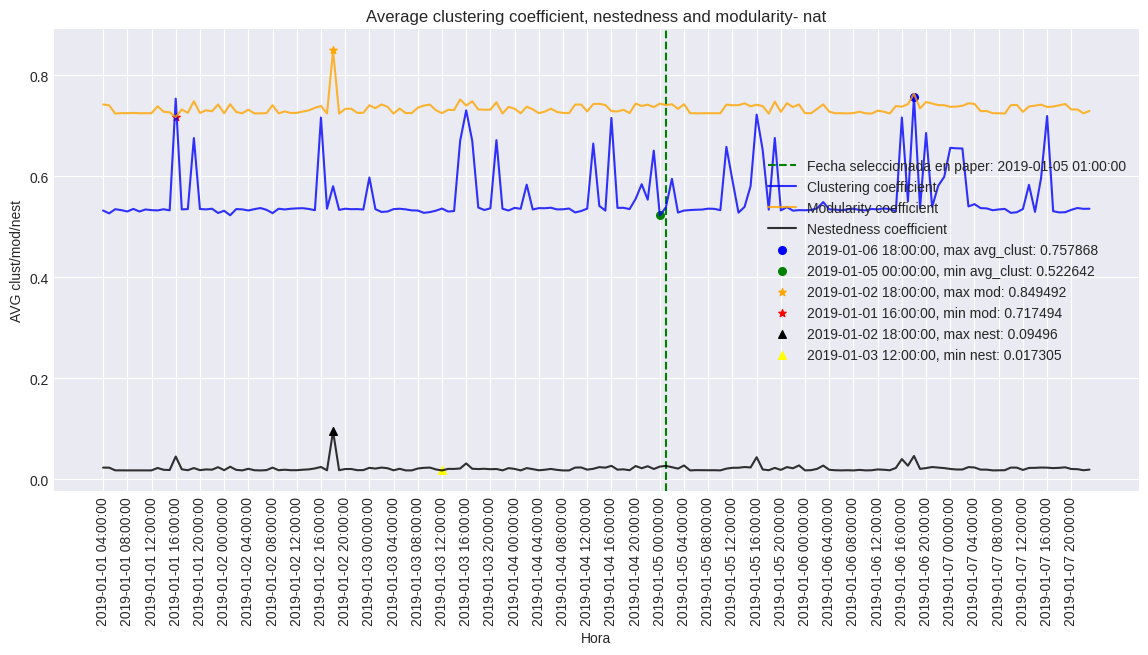

In [87]:
print(hour_sort)
if MANIFESTACION == "9n":
        fecha=str(int(437038))
        index_fecha=hour_sort.index(fecha)
        init=str(int(1573196400/3600))
        index_init=hour_sort.index(init)
        end=str(int(1573405200/3600))
        index_end=hour_sort.index(end)
else:
        fecha=str(int(429624))
        index_fecha=hour_sort.index(fecha)
        init=str(int(429531))
        index_init=hour_sort.index(init)
        end=str(int(1546902000/3600))
        index_end=hour_sort.index(end)
print("Fecha identificada en paper para", MANIFESTACION, datetime.datetime.fromtimestamp(int(fecha)*3600))
print("Fecha inicial en paper", dt_sort_arr[index_init], ", fecha final en paper", dt_sort_arr[index_end])
plt.figure(figsize=(14,6)) 
plt.style.use('seaborn-v0_8-darkgrid')    

plt.axvline(x=dt_sort_arr[index_fecha], color="green", ls="--", label="Fecha seleccionada en paper: " + str(datetime.datetime.fromtimestamp(int(fecha)*3600)))


plt.plot(dt_sort_arr[index_init:index_end], clust_sort[index_init:index_end], alpha=0.8, c="blue", label="Clustering coefficient")
plt.plot(dt_sort_arr[index_init:index_end], mod_sort[index_init:index_end], alpha=0.8, c="orange", label="Modularity coefficient")
plt.plot(dt_sort_arr[index_init:index_end], nest_sort[index_init:index_end], alpha=0.8, c="black", label="Nestedness coefficient")

name_max_clust = str(dt_sort_arr[index_init:index_end][clust_sort[index_init:index_end].index(max(clust_sort[index_init:index_end]))]) + ", max avg_clust: " + str(round(max(clust_sort[index_init:index_end]), 6))
name_min_clust  = str(dt_sort_arr[index_init:index_end][clust_sort[index_init:index_end].index(min(clust_sort[index_init:index_end]))]) + ", min avg_clust: " + str(round(min(clust_sort[index_init:index_end]), 6))
plt.scatter(dt_sort_arr[index_init:index_end][clust_sort[index_init:index_end].index(max(clust_sort[index_init:index_end]))], max(clust_sort[index_init:index_end]), s=30, c="blue", marker="o", label = name_max_clust)
plt.scatter(dt_sort_arr[index_init:index_end][clust_sort[index_init:index_end].index(min(clust_sort[index_init:index_end]))], min(clust_sort[index_init:index_end]), s=30, c="green", marker="o", label = name_min_clust)

name_max_mod = str(dt_sort_arr[index_init:index_end][mod_sort[index_init:index_end].index(max(mod_sort[index_init:index_end]))]) + ", max mod: " + str(round(max(mod_sort[index_init:index_end]), 6))
name_min_mod  = str(dt_sort_arr[index_init:index_end][mod_sort[index_init:index_end].index(min(mod_sort[index_init:index_end]))]) + ", min mod: " + str(round(min(mod_sort[index_init:index_end]), 6))
plt.scatter(dt_sort_arr[index_init:index_end][mod_sort[index_init:index_end].index(max(mod_sort[index_init:index_end]))], max(mod_sort[index_init:index_end]), s=30, c="orange", marker="*", label = name_max_mod)
plt.scatter(dt_sort_arr[index_init:index_end][mod_sort[index_init:index_end].index(min(mod_sort[index_init:index_end]))], min(mod_sort[index_init:index_end]), s=30, c="red", marker="*", label = name_min_mod)
#plt.plot(points[0], points[1], alpha=alpha, label="K_T = " + str(arr_kt_plot[index]))

name_max_nest = str(dt_sort_arr[index_init:index_end][nest_sort[index_init:index_end].index(max(nest_sort[index_init:index_end]))]) + ", max nest: " + str(round(max(nest_sort[index_init:index_end]), 6))
name_min_nest  = str(dt_sort_arr[index_init:index_end][nest_sort[index_init:index_end].index(min(nest_sort[index_init:index_end]))]) + ", min nest: " + str(round(min(nest_sort[index_init:index_end]), 6))
plt.scatter(dt_sort_arr[index_init:index_end][nest_sort[index_init:index_end].index(max(nest_sort[index_init:index_end]))], max(nest_sort[index_init:index_end]), s=30, c="black", marker="^", label = name_max_nest)
plt.scatter(dt_sort_arr[index_init:index_end][nest_sort[index_init:index_end].index(min(nest_sort[index_init:index_end]))], min(nest_sort[index_init:index_end]), s=30, c="yellow", marker="^", label = name_min_nest)
   
plt.xlabel("Hora")
plt.ylabel("AVG clust/mod/nest")
plt.xticks(dt_sort_arr[index_init:index_end][::4], labels=dt_sort_arr[index_init:index_end][::4])
plt.xticks(rotation=90)
plt.title("Average clustering coefficient, nestedness and modularity- " + MANIFESTACION)
plt.legend()

plt.savefig("paper_avg_clust_mod_nest_" + MANIFESTACION + file_maxcomp, bbox_inches = "tight")

plt.show()


In [88]:
dt_sort_arr[index_init]

datetime.datetime(2019, 1, 1, 4, 0)